# 問題１

In [16]:
!pip install tensorflow==1.15.0

In [17]:
!pip install keras==2.2.4

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import tensorflow

In [20]:
tensorflow.__version__

'1.15.0'

In [ ]:
!pip install kaggle

In [21]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!mkdir .kaggle

In [ ]:
!ls -a

annotation.txt	.gitignore	    model    predict.py  simpsons_dataset
.DS_Store	.ipynb_checkpoints  out.csv  README.md	 train.py
.git		.kaggle		    output   save


# New Section

In [ ]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = 
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!ls -a .kaggle

.  ..  kaggle.json


In [ ]:
!mkdir /root/.kaggle/

In [ ]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [ ]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [ ]:
!cat /root/.kaggle/kaggle.json

{"username": "ryomisa", "key": "5e6a5928c2c96040e31108d9bc8c2fb3"}

In [ ]:
# kaggle APIコマンドが使えるかどうかを確認


!kaggle competitions list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [22]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [ ]:
# simpsonデータセットのAPIコマンドでデータセットをダウンロードする
# APIコマンドはこちらのサイトを参照。https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

 98% 1.06G/1.08G [00:13<00:00, 102MB/s]
100% 1.08G/1.08G [00:13<00:00, 86.6MB/s]


In [ ]:
!unzip /content/drive/'My Drive'/the-simpsons-characters-dataset.zip  -d Simpsons

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1270.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset

In [ ]:
!git clone https://github.com/duckrabbits/ObjectDetection.git

Cloning into 'ObjectDetection'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 49 (delta 4), reused 9 (delta 2), pack-reused 28
Unpacking objects: 100% (49/49), done.


In [ ]:
#!git clone https://github.com/duckrabbits/ObjectDetection/annotation.txt

Cloning into 'annotation.txt'...
remote: Not Found
fatal: repository 'https://github.com/duckrabbits/ObjectDetection/annotation.txt/' not found


In [ ]:
# https://github.com/duckrabbits/ObjectDetection/tree/master
# この後、上述のgithubのreadmeに沿って、simpsons_datasetフォルダをプロジェクトフォルダ配下に格納しましょう。
# testデータなども同様に準備してみよう。

In [ ]:
!mv Simpsons/simpsons_dataset ObjectDetection/

In [ ]:
!cd ObjectDetection/

In [ ]:
!mv Simpsons/annotation.txt ObjectDetection/

In [8]:
cd ObjectDetection

/content/drive/MyDrive/ObjectDetection


In [ ]:
!python train.py -p annotation.txt

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20210326-061543_config.pickle
-------------------------------









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLaye

In [ ]:
!python predict.py -i /content/drive/MyDrive/Simpsons/kaggle_simpson_testset -c ./save/train_20210326-061543_config.pickle

Using TensorFlow backend.










2021-03-26 06:20:29.619049: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-03-26 06:20:29.623463: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-03-26 06:20:29.623669: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x563e25d11d40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-03-26 06:20:29.623700: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-03-26 06:20:29.625454: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-03-26 06:20:29.758682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA no

# 問題2

1.RPN・・・resnet.py内のrpn関数で定義している。
   
def rpn(base_layers, num_anchors)


2.ROIプーリング・・・RoiPoolingConv.pyで実装

class RoiPoolingConv(Layer)


3.Ancors Boxの設定・・・faster_rcnn.pyのget_model関数で定義し、rpn関数に渡している(17,18行目)

# 問題３

In [23]:
import os
os.chdir('/content/drive/My Drive/')

In [24]:
print(os.getcwd())

/content/drive/My Drive


In [ ]:
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 1.72 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [25]:
cd keras-yolo3

/content/drive/My Drive/keras-yolo3


In [ ]:
ls

coco_annotation.py  kmeans.py     README.md            yolo.py
convert.py          LICENSE       train_bottleneck.py  yolov3.cfg
darknet/            logs/         train.py             yolov3-tiny.cfg
darknet53.cfg       model_data/   voc_annotation.py    yolov3.weights
font/               __pycache__/  yolo3/               yolo_video.py


In [ ]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5931, done.
remote: Total 5931 (delta 0), reused 0 (delta 0), pack-reused 5931
Receiving objects: 100% (5931/5931), 6.34 MiB | 3.69 MiB/s, done.
Resolving deltas: 100% (3925/3925), done.
Checking out files: 100% (979/979), done.


In [11]:
cd darknet

/content/drive/MyDrive/keras-yolo3/darknet


In [15]:
!make

make: Nothing to be done for 'all'.


In [13]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-03-29 04:21:43--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  22.8MB/s    in 12s     

2021-03-29 04:21:55 (20.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [14]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/dog.jpg

/bin/bash: ./darknet: Permission denied


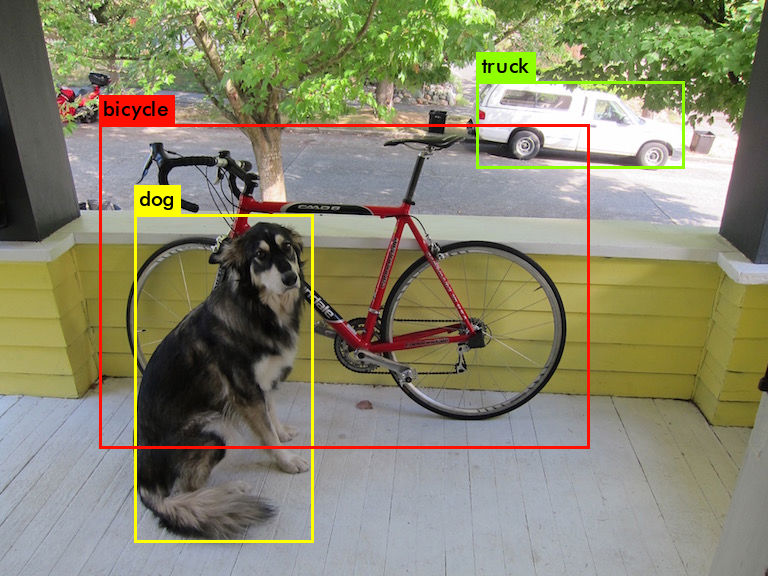

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/person.jpg

/bin/bash: ./darknet: Permission denied


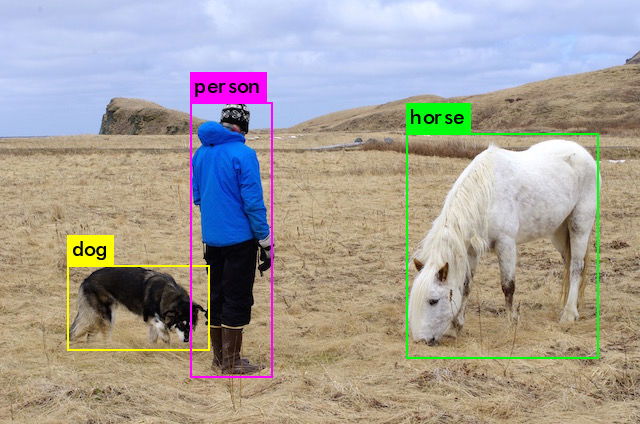

In [ ]:
os.chdir('/content/drive/My Drive/')

In [15]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2021-03-29 00:19:15.425601: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-03-29 00:19:15.430806: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2021-03-29 00:19:15.431182: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b364ce8a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-03-29 00:19:15.431220: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-03-29 00:19:15.433355: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-03-29 00:19:15.543438: I tenso

In [ ]:
#!python yolo_video.py [OPTIONS...] --image, for image detection mode, OR
!python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2021-03-26 09:44:17.580458: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-03-26 09:44:17.585425: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-03-26 09:44:17.585630: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55f52117aa00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-03-26 09:44:17.585658: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-03-26 09:44:17.587398: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-03-26 09:44:17.713315: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negati

In [ ]:
!python yolo_video.py [video_path] [output_path (optional)]
#!python yolo_video.py

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `python yolo_video.py [video_path] [output_path (optional)]'


# 問題4

# 問題5

In [ ]:
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2021-03-27 01:31:25.600810: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-03-27 01:31:25.605279: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-03-27 01:31:25.605487: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55a14808aa00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-03-27 01:31:25.605516: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-03-27 01:31:25.609343: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-03-27 01:31:25.804891: I tenso

In [28]:
#!python train.py -p train.txt
!python train.py

Using TensorFlow backend.








2021-03-29 06:04:09.345061: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-03-29 06:04:09.349373: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2021-03-29 06:04:09.349554: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d14cf6aa00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-03-29 06:04:09.349584: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-03-29 06:04:09.351189: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-03-29 06:04:09.449419: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node

### 回ったのは確認出来たので、止める。